### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import skew, norm, probplot, boxcox, f_oneway
import datetime


#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [4]:
User_Ratings=pd.read_csv('Data.csv')
Movie_Genre=pd.read_csv('item.csv')
User_Details=pd.read_csv('user.csv')


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [20]:
User_Ratings.info

(100000, 4)

In [15]:
User_Ratings.shape


(100000, 4)

In [16]:
User_Ratings.describe()

,user id,movie id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [18]:
User_Ratings.isnull()

,user id,movie id,rating,timestamp
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
99995,False,False,False,False
99996,False,False,False,False
99997,False,False,False,False
99998,False,False,False,False


In [21]:
Movie_Genre.info

<bound method DataFrame.info of       movie id                          movie title release date  unknown  \
0            1                           Toy Story   01-Jan-1995        0   
1            2                           GoldenEye   01-Jan-1995        0   
2            3                          Four Rooms   01-Jan-1995        0   
3            4                          Get Shorty   01-Jan-1995        0   
4            5                             Copycat   01-Jan-1995        0   
...        ...                                  ...          ...      ...   
1676      1678                          Mat' i syn   06-Feb-1998        0   
1677      1679                           B. Monkey   06-Feb-1998        0   
1678      1680                       Sliding Doors   01-Jan-1998        0   
1679      1681                        You So Crazy   01-Jan-1994        0   
1680      1682  Scream of Stone (Schrei aus Stein)   08-Mar-1996        0   

      Action  Adventure  Animation  Childre

In [22]:
Movie_Genre.shape

(1681, 22)

In [23]:
Movie_Genre.describe()

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
Movie_Genre.isnull()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1677,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1678,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
User_Details.info

<bound method DataFrame.info of      user id  age gender     occupation zip code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]>

In [26]:
User_Details.shape

(943, 5)

In [27]:
User_Details.describe()

,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [28]:
User_Details.isnull()

,user id,age,gender,occupation,zip code
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
938,False,False,False,False,False
939,False,False,False,False,False
940,False,False,False,False,False
941,False,False,False,False,False


#### 4. Find the number of movies per genre using the item data - 5 marks

In [29]:
# use sum on the default axis
Movie_Genre.sum()

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

#### 5. Find the movies that have more than one genre - 2.5 marks

In [39]:
#hint: use sum on the axis = 1
Movie_Genre.sum(1)

0          4
1          5
2          4
3          7
4          8
        ... 
1676    1679
1677    1681
1678    1682
1679    1682
1680    1683
Length: 1681, dtype: int64

#### 6. Drop the movie where the genre is unknown - 2.5 marks

NameError: name 'drop' is not defined

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [ ]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [ ]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

In [91]:
#your answers here
df=pd.merge(User_Ratings,User_Details,on='user id',how='inner')
print(df)
df1=pd.merge(df,Movie_Genre,on='movie id',how='inner')
print(df1)

       user id  movie id  rating  timestamp  age gender occupation zip code
0          196       242       3  881250949   49      M     writer    55105
1          196       393       4  881251863   49      M     writer    55105
2          196       381       4  881251728   49      M     writer    55105
3          196       251       3  881251274   49      M     writer    55105
4          196       655       5  881251793   49      M     writer    55105
...        ...       ...     ...        ...  ...    ...        ...      ...
99995      941       919       5  875048887   20      M    student    97229
99996      941       273       3  875049038   20      M    student    97229
99997      941         1       5  875049144   20      M    student    97229
99998      941       294       4  875048532   20      M    student    97229
99999      941      1007       4  875049077   20      M    student    97229

[100000 rows x 8 columns]
       user id  movie id  rating  timestamp  age gender  occu

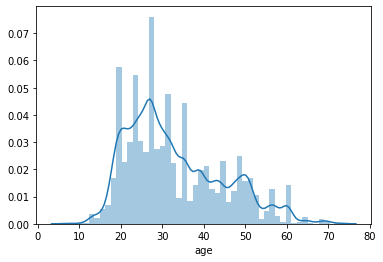

In [93]:
sns.distplot(df1['age'])

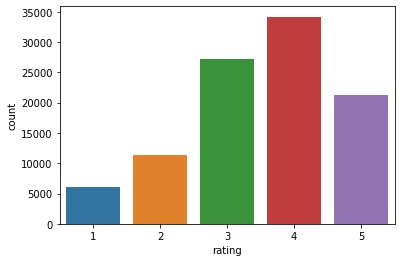

In [81]:
sns.countplot(df1['rating'])

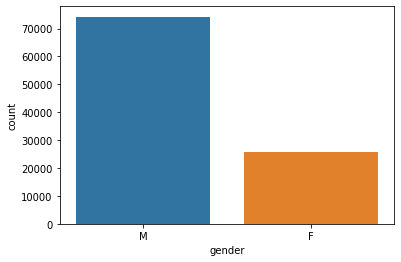

In [82]:
sns.countplot(df1['gender'])

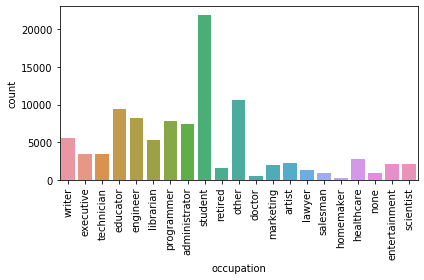

In [83]:
frame=sns.countplot(df1['occupation'])
frame.set_xticklabels(frame.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()


In [95]:
df1['release year']=pd.DatetimeIndex(df1['release date']).year


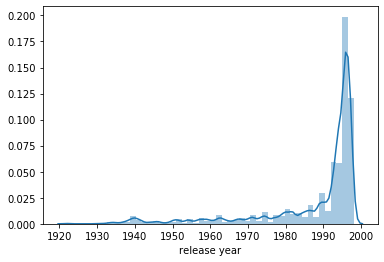

In [105]:
sns.distplot(df1['release year'])

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

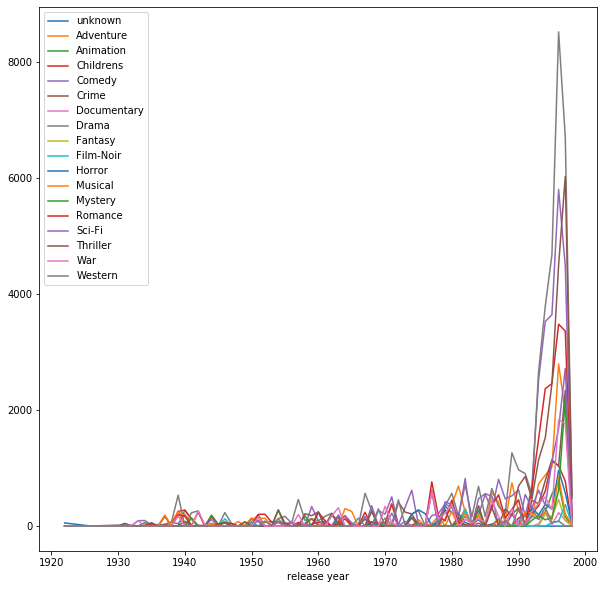

In [156]:
#Your answer here
df2 = df1[['release year','unknown','Adventure','Animation', 'Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']].groupby('release year').sum().plot(figsize=(10,10))
plt.show()

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [232]:
#your answer here.
#I already created a merge dataframe in the previous question
df1.head()
df3 = df1[['movie title','rating']].groupby('movie title').count()
df3list=df3['rating']>100

print(df3list)
print(df3)
df4 = df1[['movie title','rating']].groupby('movie title').mean()
print(df4)


movie title
'Til There Was You                 False
1-900                              False
101 Dalmatians                      True
12 Angry Men                        True
187                                False
                                   ...  
Young Guns                          True
Young Guns II                      False
Young Poisoner's Handbook, The     False
Zeus and Roxanne                   False
Á köldum klaka (Cold Fever)        False
Name: rating, Length: 1658, dtype: bool
                                 rating
movie title                            
'Til There Was You                    9
1-900                                 5
101 Dalmatians                      109
12 Angry Men                        125
187                                  41
...                                 ...
Young Guns                          101
Young Guns II                        44
Young Poisoner's Handbook, The       41
Zeus and Roxanne                      6
Á köldum klaka (C

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [211]:
df1.head()

,user id,movie id,rating,timestamp,age,gender,occupation,zip code,movie title,release date,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,196,242,3,881250949,49,M,writer,55105,Kolya,24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997
1,305,242,5,886307828,23,M,programmer,94086,Kolya,24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997
2,6,242,4,883268170,42,M,executive,98101,Kolya,24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997
3,234,242,4,891033261,60,M,retired,94702,Kolya,24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997
4,63,242,3,875747190,31,M,marketing,75240,Kolya,24-Jan-1997,...,0,0,0,0,0,0,0,0,0,1997
